In [1]:
import numpy as np
import pandas as pd

from textblob import TextBlob

import seaborn as sns
%matplotlib inline


from nlp.cat_tags import get_cat_tags

In [2]:
DIR = "../data/boston-airbnb-open-data/"

# Loading the datasets

In [3]:
# Availability calendar
calendar = pd.read_csv(DIR+"calendar.csv")

# Listings
listings = pd.read_csv(DIR+"listings.csv")

# Guests' reviews
reviews = pd.read_csv(DIR+"reviews.csv")

***

# Exploring the reviews

## Remove NaN

In [4]:
reviews.dropna(inplace=True)
reviews.reset_index(inplace=True)

## Sentiment analyzes

### Quaintitative

In [5]:
sentiments = []

for i in range(reviews.shape[0]):
    score = TextBlob(reviews["comments"][i]).sentiment.polarity
    sentiments.append(score)       
    
reviews["sentiment"] = sentiments

/Users/victor/.local/share/virtualenvs/Peper-Analysis-eBzTI8A5/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


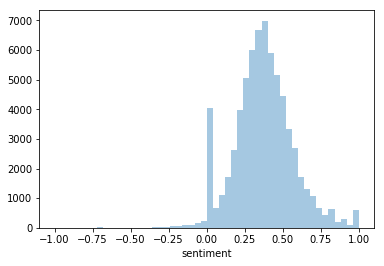

In [6]:
sns.distplot(reviews["sentiment"], kde=False);

### Qualitative

In [7]:
sentiment_cat = []
for sent in sentiments:
    if -.25 < sent < .25:
        sentiment_cat.append(0)
    elif sent <= -.25:
        sentiment_cat.append(-1)
    else:
        sentiment_cat.append(1)
        
reviews["sentiment_cat"] = sentiment_cat

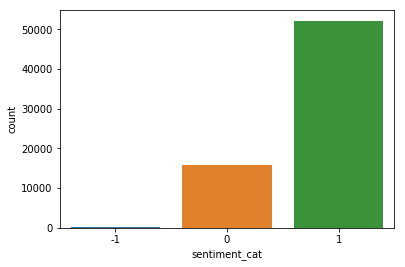

In [8]:
sns.countplot(reviews["sentiment_cat"]);

## Extracting Categorical Tags

In [11]:
reviews["comments"][10]

"Our stay at Islam's was very enjoyable, Islam is a very kind and responsive host.\r\nThe room was clean and comfortable and the house is provided with all comforts: full kitchen, satellite TV, comfortable living room, excellent WIFI connection in all areas.\r\nIt is extremely conveniently located to downtown Boston (a few metro stops) and walking distance to the free shuttles connecting to the airport. "

In [12]:
get_cat_tags(reviews["comments"][10], verbose=True)


----------------------------------------------------------------------------------------------------
	Running `get_cat_tags`...
----------------------------------------------------------------------------------------------------
Part of Speech Tags: [('Our', 'PRP$'), ('stay', 'NN'), ('at', 'IN'), ('Islam', 'NNP'), ("'s", 'POS'), ('was', 'VBD'), ('very', 'RB'), ('enjoyable', 'JJ'), (',', ','), ('Islam', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('very', 'RB'), ('kind', 'NN'), ('and', 'CC'), ('responsive', 'JJ'), ('host', 'NN'), ('.', '.'), ('The', 'DT'), ('room', 'NN'), ('was', 'VBD'), ('clean', 'JJ'), ('and', 'CC'), ('comfortable', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('house', 'NN'), ('is', 'VBZ'), ('provided', 'VBN'), ('with', 'IN'), ('all', 'DT'), ('comforts', 'NNS'), (':', ':'), ('full', 'JJ'), ('kitchen', 'NN'), (',', ','), ('satellite', 'JJ'), ('TV', 'NN'), (',', ','), ('comfortable', 'JJ'), ('living', 'NN'), ('room', 'NN'), (',', ','), ('excellent', 'JJ'), ('WIFI', 'NNP'), ('connecti

['was very enjoyable', 'room was clean and comfortable']